## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[40, 44, 81],
       [14, 21, 82],
       [16, 59, 97],
       [ 2, 31, 60],
       [54, 70, 91],
       [32, 56, 92]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([40, 44, 81]), array([14, 21, 82]))

The lowest card in the game is

In [5]:
np.min(cards)

2

In [6]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

(array([179.,   0.,   0., 149.,   0.,   0.,   0., 132.,   0.,   0.,   0.,
        108.,   0.,   0.,  83.,   0.,   0.,   0.,  74.,   0.,   0.,   0.,
         50.,   0.,   0.,  41.,   0.,   0.,   0.,  24.,   0.,   0.,   0.,
         28.,   0.,   0.,   0.,  30.,   0.,   0.,  18.,   0.,   0.,   0.,
         20.,   0.,   0.,   0.,  11.,   0.,   0.,  11.,   0.,   0.,   0.,
         12.,   0.,   0.,   0.,   7.,   0.,   0.,   5.,   0.,   0.,   0.,
          4.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   5.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([ 1.  ,  1.27,  1.54,  1.81,  2.08,  2.35,  2.62,  2.89,  3.16,
         3.43,  3.7 ,  3.97,  4.24,  4.51,  4.78,  5.05,  5.32,  5.59,
         5.86,  6.13,  6.4 ,  6.67,  6.94,  7.21,  7.48,  7.75,  8.02,
         8.29,  8.56,  8.83,  9.1 ,  9.37,  9.64,  9.91, 10.18, 10.45,
        10.72, 10.99, 11.26, 11.53

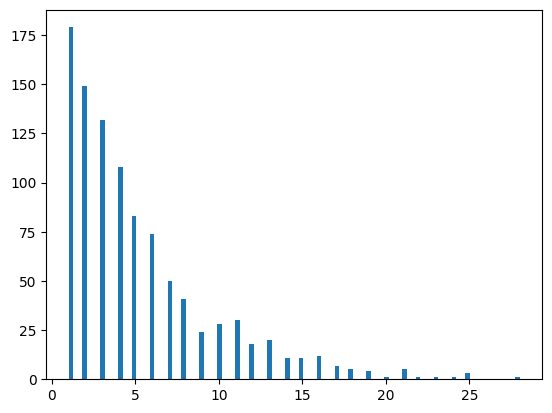

In [7]:
N = 100
n = 6
k = 3
min_card = []

for i in range(1, 1000):
    cards = sample_cards(N, n, k)
    min_card.append(np.min(cards))

plt.hist(min_card, bins = N)

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

mean: 16.988798879887987


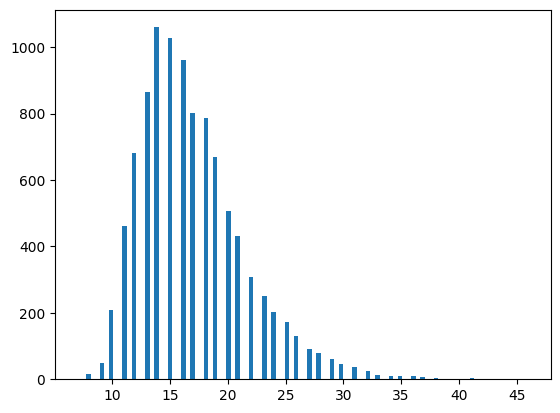

In [8]:
gaps = []
max_gap = 0

for i in range(1, 10000):
    cards = sample_cards(N, n, k)
    cards = cards.flatten()
    cards.sort()

    for j in range(n * k - 1):
        if abs(cards[j] - cards[j + 1]) > max_gap:
            max_gap = abs(cards[j] - cards[j + 1])
    gaps.append(max_gap)
    max_gap = 0

plt.hist(gaps, bins = N) 
print("mean: {}".format(np.mean(gaps)))

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

16.415164151641516


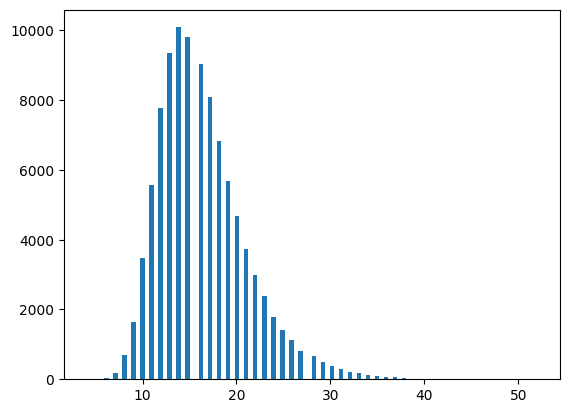

In [9]:
gap_diff_play = []
max_gap_diff_play = 0
cards_per_player = N / n

for i in range(1, 100000):
    cards = sample_cards(N, n, k)
    cards = cards.flatten()
    players = []
    for player_idx in range(n):
        players += [player_idx] * k 
    idx = np.argsort(cards)
    cards.sort()
    for j in range(len(cards) - 1):
        if (abs(cards[j] - cards[j + 1]) > max_gap_diff_play)\
            and (players[idx[j]] is not players[idx[j + 1]]):
            max_gap_diff_play = abs(cards[j] - cards[j + 1])
    gap_diff_play.append(max_gap_diff_play)
    max_gap_diff_play = 0

plt.hist(gap_diff_play, bins = N)
print(np.mean(gap_diff_play))





How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

Players:     4	Cards per:     1	Mean gap (all): 36.485849	Mean gap (diff): 36.589606
Players:     5	Cards per:     1	Mean gap (all): 34.294829	Mean gap (diff): 34.499455
Players:     6	Cards per:     1	Mean gap (all): 32.365237	Mean gap (diff): 32.278773
Players:     7	Cards per:     1	Mean gap (all): 30.140014	Mean gap (diff): 30.182862
Players:     8	Cards per:     1	Mean gap (all): 28.379738	Mean gap (diff): 28.287933
Players:     9	Cards per:     1	Mean gap (all): 26.565157	Mean gap (diff): 26.541865


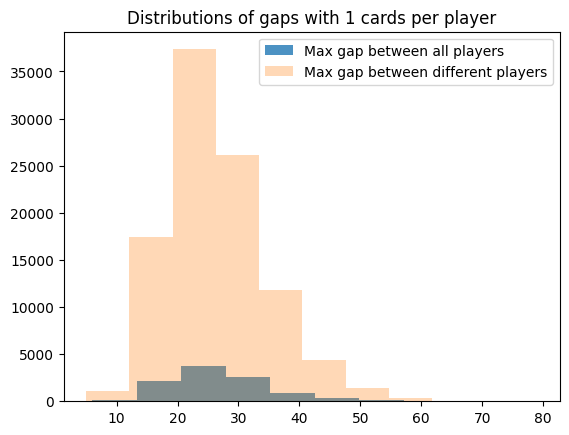

Players:     4	Cards per:     2	Mean gap (all): 28.283128	Mean gap (diff): 26.690177
Players:     5	Cards per:     2	Mean gap (all): 24.948395	Mean gap (diff): 23.989520
Players:     6	Cards per:     2	Mean gap (all): 22.216722	Mean gap (diff): 21.736097
Players:     7	Cards per:     2	Mean gap (all): 20.453145	Mean gap (diff): 19.778948
Players:     8	Cards per:     2	Mean gap (all): 18.495050	Mean gap (diff): 18.139451
Players:     9	Cards per:     2	Mean gap (all): 16.958096	Mean gap (diff): 16.725467


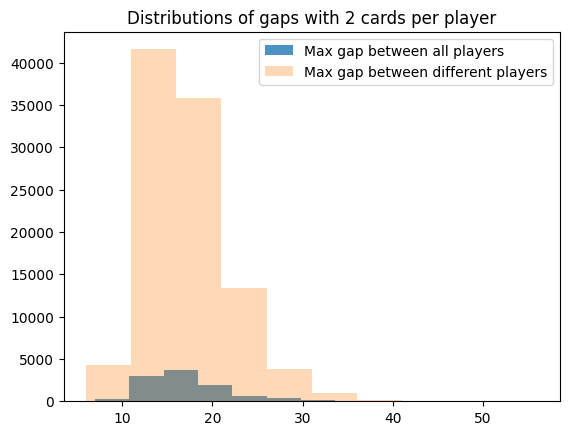

Players:     4	Cards per:     3	Mean gap (all): 22.308431	Mean gap (diff): 20.943449
Players:     5	Cards per:     3	Mean gap (all): 19.337034	Mean gap (diff): 18.481245
Players:     6	Cards per:     3	Mean gap (all): 16.944994	Mean gap (diff): 16.415104
Players:     7	Cards per:     3	Mean gap (all): 15.170217	Mean gap (diff): 14.725867
Players:     8	Cards per:     3	Mean gap (all): 13.572957	Mean gap (diff): 13.314763
Players:     9	Cards per:     3	Mean gap (all): 12.374437	Mean gap (diff): 12.116381


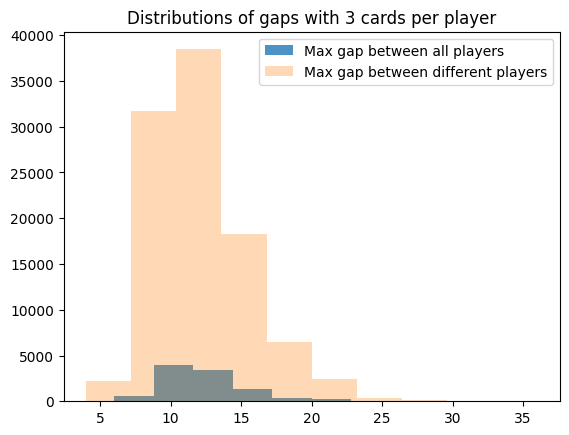

Players:     4	Cards per:     4	Mean gap (all): 18.432443	Mean gap (diff): 17.304813
Players:     5	Cards per:     4	Mean gap (all): 15.804480	Mean gap (diff): 14.980460
Players:     6	Cards per:     4	Mean gap (all): 13.644364	Mean gap (diff): 13.164182
Players:     7	Cards per:     4	Mean gap (all): 12.033203	Mean gap (diff): 11.652037
Players:     8	Cards per:     4	Mean gap (all): 10.690269	Mean gap (diff): 10.428114
Players:     9	Cards per:     4	Mean gap (all): 9.560256	Mean gap (diff): 9.394884


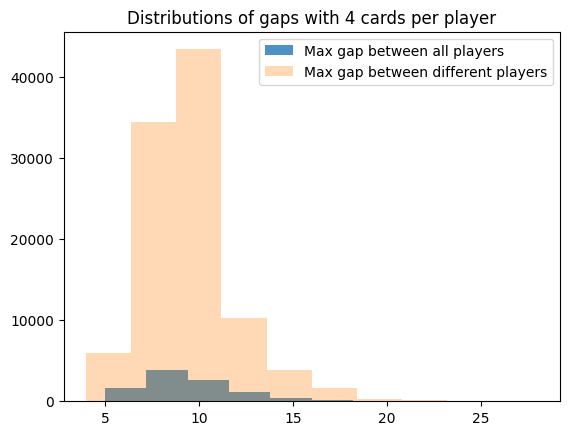

In [10]:
def gap_all_players(N, n, k, mean = False):
    gaps = []
    max_gap = 0

    for i in range(1, 10000):
        cards = sample_cards(N, n, k)
        cards = cards.flatten()
        cards.sort()

        for j in range(n * k - 1):
            if abs(cards[j] - cards[j + 1]) > max_gap:
                max_gap = abs(cards[j] - cards[j + 1])
        gaps.append(max_gap)
        max_gap = 0

    if mean:
        return np.mean(gaps)

    return gaps

def gap_diff_players(N, n, k, mean = False):
    gap_diff_play = []
    max_gap_diff_play = 0
    cards_per_player = N / n

    for i in range(1, 100000):
        cards = sample_cards(N, n, k)
        cards = cards.flatten()
        players = []
        for player_idx in range(n):
            players += [player_idx] * k 
        idx = np.argsort(cards)
        cards.sort()
        for j in range(len(cards) - 1):
            if (abs(cards[j] - cards[j + 1]) > max_gap_diff_play)\
                and (players[idx[j]] is not players[idx[j + 1]]):
                max_gap_diff_play = abs(cards[j] - cards[j + 1])
        gap_diff_play.append(max_gap_diff_play)
        max_gap_diff_play = 0

    if mean:
        return np.mean(gap_diff_play)

    return gap_diff_play

for ncards_per_player in np.arange(1, 5):
    for nplayers in np.arange(4, 10):
        mean_gap_all = gap_all_players(N, nplayers, ncards_per_player, mean = True)
        mean_gap_diff = gap_diff_players(N, nplayers, ncards_per_player, mean = True)
        print("Players: {:5}\tCards per: {:5}\tMean gap (all): {:f}\tMean gap (diff): {:f}"\
              .format(nplayers, ncards_per_player, mean_gap_all, mean_gap_diff))
        gap_all = gap_all_players(N, nplayers, ncards_per_player)
        gap_diff = gap_diff_players(N, nplayers, ncards_per_player) 
        

    plt.hist(gap_all, alpha = 0.8, label='Max gap between all players')
    plt.hist(gap_diff, alpha = 0.3, label='Max gap between different players')

    plt.legend(loc='upper right')
    plt.title("Distributions of gaps with {} cards per player".format(ncards_per_player))
    plt.show()




I noticed that across the board, as the number of players increased, the mean gap (regardless of all or different players) decreased. This is expected behavior -- as we hold the number of cards per player constant, we should expect to see that as the number of players increase, there is more likely for someone else to have a card close to yours. What is interesting to note though, is that as the number of cards per player increased, the mean gaps across the board decreased. 

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

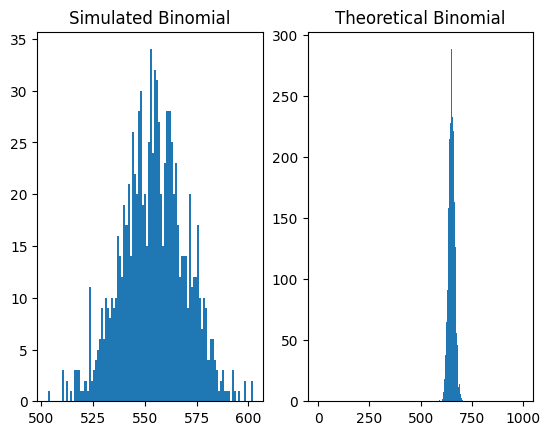

In [44]:
# To simulate binomial distribution, we create a sequence of Bernoulli r.v.
# Since we know the distribution of minimum values is skewed right, we can use that to simulate the Bernoulli

from scipy.stats import binom

# Initialization
N = 100
n = 6
k = 3
t = 5
n_iter = 1000

# Creating functions for simulation
def sim_bernoulli(N: int, n: int, k: int, t: int) -> int:
    """Simulate a bernoulli r.v. by taking a sample of cards and asking if min of the sample is less than a threshold

    Args:
        N: Total number of cards
        n: Number of players
        k: Number of cards per player
        t: Threshold for the minimum
        
    Returns:
        is_smaller: int representing a boolean
    """
    is_smaller = 1
    cards = sample_cards(N, n, k)
    if np.min(cards) < t:
        return is_smaller 
    else:
        is_smaller = 0
        return is_smaller 

def sim_binomial(N: int, n: int, k: int, t: int, n_iter: int) -> int:
    """Simulate a binomial r.v. using the bernoulli r.v.

    Args:
        N: Total number of cards
        n: Number of players
        k: Number of cards per player
        t: Threshold for the minimum
        n_iter: Number of simulation iterations
        
    Returns:
        success_count: number of successes in n_iter
    """
    success_count = 0
    for i in range(n_iter):
        if sim_bernoulli(N, n, k, t) == 1:
            success_count += 1
    
    
    return success_count

def print_info(results: list) -> None:
    """Plot binomial distribution and results of simulation

    Args:
        results: results from simulation
    Returns:
        None
    """
    binom_true = np.random.binomial(n_iter, 0.65, 10000)
    bin = np.arange(0, n_iter, 1)

    # Plotting
    fig, axes = plt.subplots(1, 2)
    axes[0].hist(results, bins = N)
    axes[0].set_title("Simulated Binomial")
    axes[1].hist(binom_true, bins = bin)
    axes[1].set_title("Theoretical Binomial")
    plt.show()
    
def main():
    # Simulation driver code
    sim_results = []
    for i in range(n_iter):
        sim_results.append(sim_binomial(N, n, k, t, n_iter))
    
    # Visualizing results
    print_info(sim_results)

if __name__ == "__main__":
    main()


### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

[1.80000000e+01 1.79877627e+01 1.79755332e+01 ... 3.05371284e-03
 3.05025393e-03 3.04679870e-03]


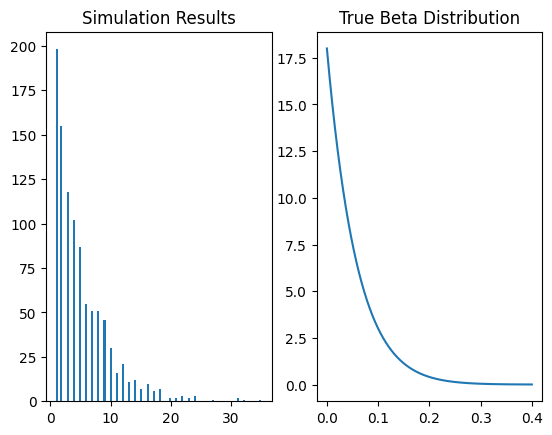

In [45]:
from scipy.stats import beta

# Initialization
N = 100
n = 6
k = 3
n_iter = 1000

def sim_min(N: int, n: int, k: int, n_iter: int) -> list:
    """Simulate games and get the min card value

    Args:
        N: Total number of cards
        n: Number of players
        k: Number of cards per player
    Returns:
        min_card: list containing minimum values
    """
    min_card = []
    for i in range(n_iter):
        cards = sample_cards(N, n, k)
        min_card.append(np.min(cards))

    return min_card

def make_plots(sim_results: list) -> None:
    """Plot beta distribution and results of simulation

    Args:
        sim_results: resumts from simulation
    Returns:
        None
    """
    # create beta distribution
    a = 1
    b = n * k + 1 - a
    x = np.linspace(0, 0.4, 10000)
    beta_sim = beta.pdf(x, a, b)
    bins = np.arange(0, n_iter, 1)

    # Plotting
    fig, axes = plt.subplots(1, 2)
    axes[0].hist(sim_results, bins = N)
    axes[0].set_title("Simulation Results")
    axes[1].plot(x, beta_sim)
    axes[1].set_title("True Beta Distribution")
    plt.show()

def main():
    sim_minimum = sim_min(N, n, k, n_iter)
    make_plots(sim_minimum)

if __name__ == "__main__":
    main()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

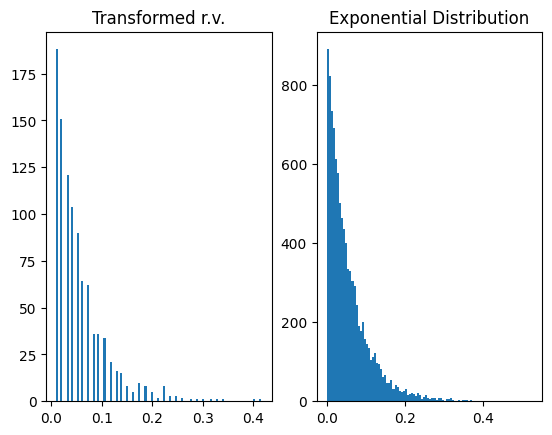

In [72]:

# Initialization
N = 100
n = 6
k = 3
n_iter = 1000

def x_pdf(U: list, N: int) -> list:
    """Transformed random variable X

    Args:
        U: list with the mins
        N: number of cards
    
    Returns:
        x: transformed r.v.
    """
    u = np.array(U)
    x = - np.log(1 - u / N )
    return x

def make_plots(x: list) -> None:
    """Plot exponential distribution and results of simulation

    Args:
        x: results from simulation
    Returns:
        None
    """
    # generate exponential pdf
    n_points = np.linspace(0, 0.4, 10000)
    s = 1 / (n * k)
    expo = np.random.exponential(s, len(n_points))

    # Plotting
    fig, axes = plt.subplots(1, 2)
    axes[0].hist(x, bins = N)
    axes[0].set_title("Transformed r.v.")
    axes[1].hist(expo, bins = N)
    axes[1].set_title("Exponential Distribution")
    plt.show()

def main():
    U = sim_min(N, n, k, n_iter)
    x = x_pdf(U, N)
    make_plots(x)


if __name__ == "__main__":
    main()

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

In [13]:
# To Do cell

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Austin Tao (alt2177)
- Member No2: Frederik Stihler 
- Member No3: 
